# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
num_pmts = 15808
csv_file = "mPMT_to_row_col.csv"


In [3]:
def GenMapping(csv_file):
    mPMT_to_index = {}
    with open(csv_file) as f:
        rows = f.readline().split(",")[1:]
        rows = [int(r.strip()) for r in rows]

        for line in f:
            line_split = line.split(",")
            col = int(line_split[0].strip())
            for row, value in zip(rows, line_split[1:]):
                value = value.strip()
                if value: # If the value is not empty
                    mPMT_to_index[int(value)] = (row, col)
    return mPMT_to_index

mPMT_to_index = GenMapping(csv_file)
PMT_to_index = {k*19+18:v for k,v in mPMT_to_index.items()}
xy_to_PMT = {v:k for k,v in PMT_to_index.items()}

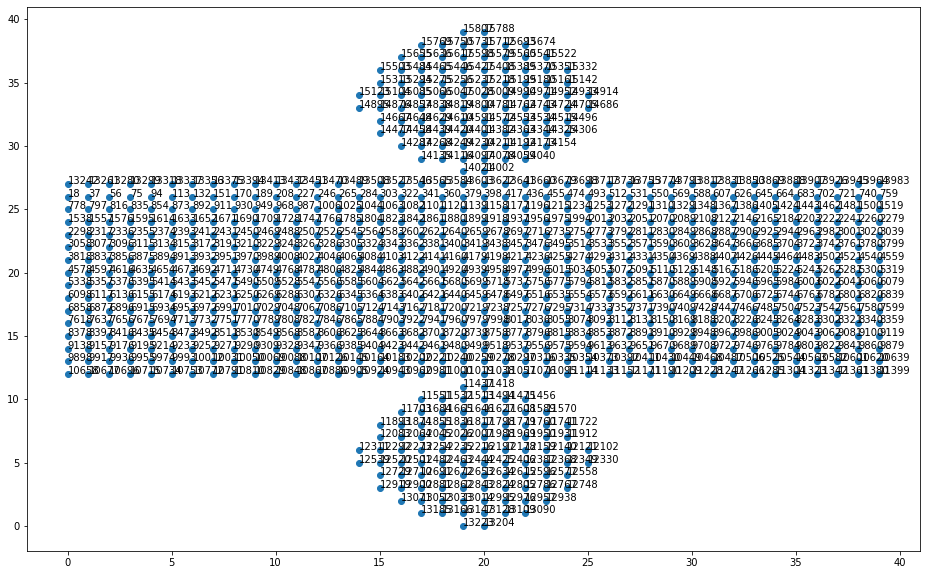

In [4]:
xs = [k[0] for k in xy_to_PMT.keys()]
ys = [k[1] for k in xy_to_PMT.keys()]
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.scatter(xs, ys)
for x, y, text in zip(xs, ys, [v for v in xy_to_PMT.values()]):
    ax.annotate(text, (x,y))
    

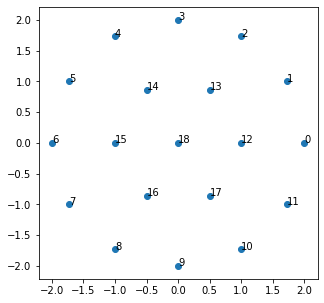

In [5]:
def plot_mPMT(ax):
    # Outer Ring
    rot12 = np.array([[np.cos(2*np.pi/12), -np.sin(2*np.pi/12)], [np.sin(2*np.pi/12), np.cos(2*np.pi/12)]])
    start = np.array([[2], [0]])
    
    xs = []
    ys = []
    for i in range(12):
        xs.append(start[0,0])
        ys.append(start[1,0])
        start = np.matmul(rot12, start)
    
    # Inner Ring
    rot6 = np.array([[np.cos(2*np.pi/6), -np.sin(2*np.pi/6)], [np.sin(2*np.pi/6), np.cos(2*np.pi/6)]])
    start = np.array([[1], [0]])
    for i in range(6):
        xs.append(start[0,0])
        ys.append(start[1,0])
        start = np.matmul(rot6, start)
    
    # Center point
    xs.append(0)
    ys.append(0)
    
    # Plot
    ax.scatter(xs,ys)
    for i, (x, y) in enumerate(zip(xs, ys)):
        ax.annotate(i, (x,y))
    return xs, ys

fig = plt.figure(figsize=(5,5))
ax = fig.gca()
plot_mPMT(ax);

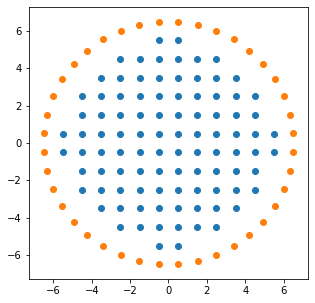

In [6]:
def plot_endcap(ax):
    xs = []
    ys = []
    
    for x in range(14, 26):
        for y in range(0, 12):
            if (x,y) in xy_to_PMT:
                xs.append(x-14-5.5)
                ys.append(y-5.5)
                
    ax.scatter(xs,ys)
    return xs, ys
    
def plot_barrel(ax):
    # Ring
    xs = []
    ys = []
    
    rot40 = np.array([[np.cos(2*np.pi/40), -np.sin(2*np.pi/40)], [np.sin(2*np.pi/40), np.cos(2*np.pi/40)]])
    start = 6.5 * np.array([[np.cos(2*np.pi/80)], [np.sin(2*np.pi/80)]])
    for i in range(40):
        xs.append(start[0,0])
        ys.append(start[1,0])
        start = np.matmul(rot40, start)
    
    ax.scatter(xs,ys)
    return xs, ys
    
    

fig = plt.figure(figsize=(5,5))
ax = fig.gca()
plot_endcap(ax)
plot_barrel(ax);

# 4 Connection per mPMT

In [7]:
# 4 Edges
edges = {i:[] for i in range(num_pmts)}
for x in range(0,40):
    for y in range(0,40):
        if (x,y) in xy_to_PMT:
            node = xy_to_PMT[(x,y)]
            if ((x+1)%40, y) in xy_to_PMT:
                edges[node].append(xy_to_PMT[((x+1)%40, y)])
            if ((x-1)%40, y) in xy_to_PMT:
                edges[node].append(xy_to_PMT[((x-1)%40, y)])
            if (x, (y+1)) in xy_to_PMT:
                edges[node].append(xy_to_PMT[(x, (y+1))])
            if (x, (y-1)) in xy_to_PMT:
                edges[node].append(xy_to_PMT[(x, (y-1))])
                
#Delete edges connecting barrel and endcap

edges[737*19+18].remove(715*19+18)
edges[736*19+18].remove(716*19+18)

edges[715*19+18].remove(737*19+18)
edges[716*19+18].remove(736*19+18)

edges[579*19+18].remove(601*19+18)
edges[580*19+18].remove(600*19+18)

edges[601*19+18].remove(579*19+18)
edges[600*19+18].remove(580*19+18)

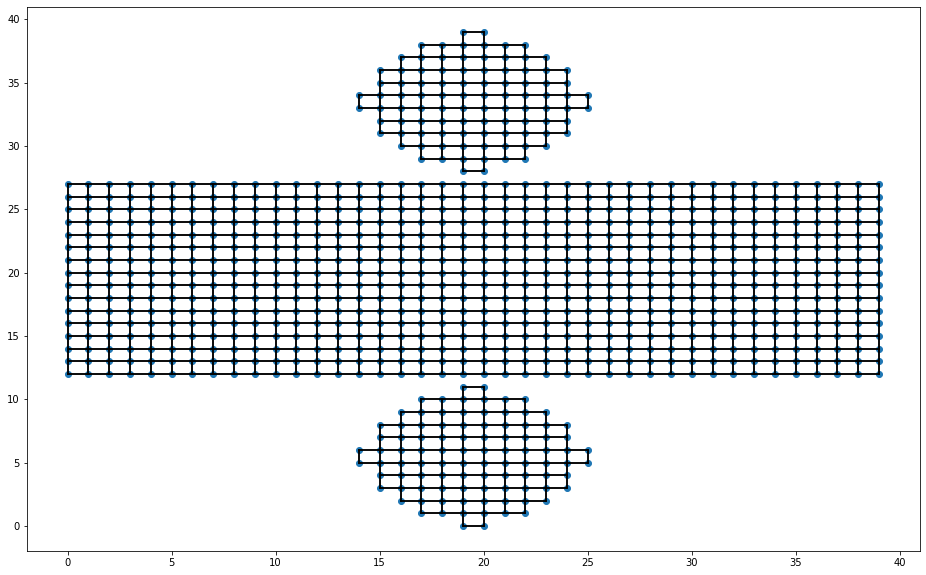

In [8]:
xs = [k[0] for k in xy_to_PMT.keys()]
ys = [k[1] for k in xy_to_PMT.keys()]
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.scatter(xs, ys)
# for x, y, text in zip(xs, ys, [v for v in xy_to_PMT.values()]):
#     ax.annotate(text, (x,y))

for start,ends in edges.items():
    if len(ends) > 0:
        xs, ys = PMT_to_index[start]
        for end in ends:
            xe, ye = PMT_to_index[end]
            if abs(xs - xe) > 2:
                pass
            else:
                plt.plot([xs,xe], [ys,ye], c="k")

# 4 + 4 Connection for mPMT

In [9]:
# +4 Edges
for x in range(0,40):
    for y in range(0,40):
        if (x,y) in xy_to_PMT:
            node = xy_to_PMT[(x,y)]
            if ((x+1)%40, y+1) in xy_to_PMT:
                edges[node].append(xy_to_PMT[((x+1)%40, y+1)])
            if ((x-1)%40, y+1) in xy_to_PMT:
                edges[node].append(xy_to_PMT[((x-1)%40, y+1)])
            if ((x+1)%40, y-1) in xy_to_PMT:
                edges[node].append(xy_to_PMT[((x+1)%40, y-1)])
            if ((x-1)%40, y-1) in xy_to_PMT:
                edges[node].append(xy_to_PMT[((x-1)%40, y-1)])
#Delete edges connecting barrel and endcap

edges[737*19+18].remove(714*19+18)
edges[737*19+18].remove(716*19+18)
edges[736*19+18].remove(715*19+18)
edges[736*19+18].remove(717*19+18)

edges[714*19+18].remove(737*19+18)
edges[716*19+18].remove(737*19+18)
edges[715*19+18].remove(736*19+18)
edges[717*19+18].remove(736*19+18)

edges[578*19+18].remove(601*19+18)
edges[580*19+18].remove(601*19+18)
edges[579*19+18].remove(600*19+18)
edges[581*19+18].remove(600*19+18)

edges[601*19+18].remove(578*19+18)
edges[601*19+18].remove(580*19+18)
edges[600*19+18].remove(579*19+18)
edges[600*19+18].remove(581*19+18)

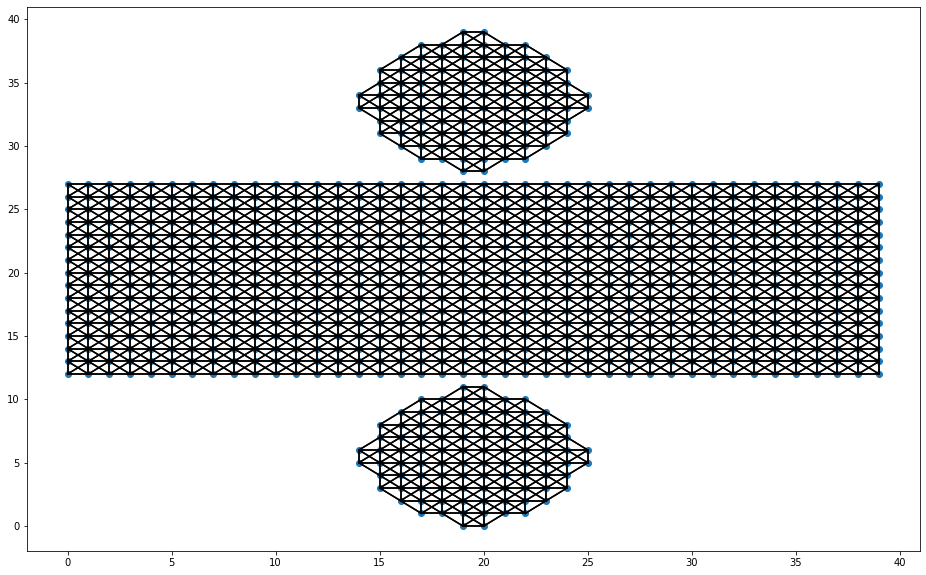

In [10]:
xs = [k[0] for k in xy_to_PMT.keys()]
ys = [k[1] for k in xy_to_PMT.keys()]
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.scatter(xs, ys)
# for x, y, text in zip(xs, ys, [v for v in xy_to_PMT.values()]):
#     ax.annotate(text, (x,y))

for start,ends in edges.items():
    if len(ends) > 0:
        xs, ys = PMT_to_index[start]
        for end in ends:
            xe, ye = PMT_to_index[end]
            if abs(xs - xe) > 2:
                pass
            else:
                plt.plot([xs,xe], [ys,ye], c="k")

# Edges with mPMT

In [11]:
within_mPMT_edges = {i:[] for i in range(19)}

# Outer ring
for i in range(12):
    within_mPMT_edges[i].append((i+1)%12)
    within_mPMT_edges[i].append((i-1)%12)
    within_mPMT_edges[i].append(18)

# Inner ring
for i in range(6):
    within_mPMT_edges[i+12].append((i+1)%6+12)
    within_mPMT_edges[i+12].append((i-1)%6+12)
    within_mPMT_edges[i+12].append(18)
    
# Center
for i in range(18):
    within_mPMT_edges[18].append(i)

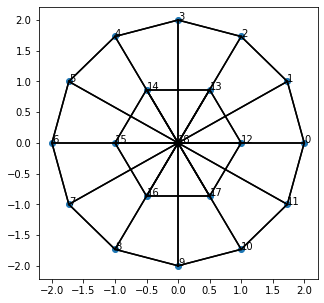

In [12]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
Xs, Ys = plot_mPMT(ax)

for start, ends in within_mPMT_edges.items():
    if len(ends) == 0:
        print("Error", start)
        
    xs = Xs[start]
    ys = Ys[start]
    for end in ends:
        xe = Xs[end]
        ye = Ys[end]
        plt.plot([xs,xe], [ys,ye], c="k")

# Barrel and Endcap connection

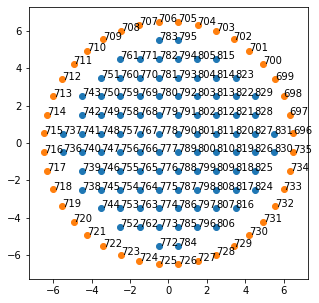

In [13]:
# Top barrel index
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
endxs, endys = plot_endcap(ax)
barxs, barys = plot_barrel(ax)

for i, (endx, endy) in enumerate(zip(endxs, endys)):
    ax.annotate(i+736, (endx, endy))
    
for i, (barx, bary) in enumerate(zip(barxs, barys)):
    ax.annotate(i+696, (barx, bary))

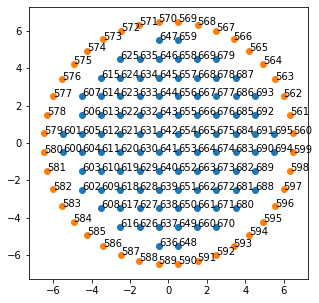

In [14]:
# Bot barrel index
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
endxs, endys = plot_endcap(ax)
barxs, barys = plot_barrel(ax)

for i, (endx, endy) in enumerate(zip(endxs, endys)):
    ax.annotate(i+600, (endx, endy))
    
for i, (barx, bary) in enumerate(zip(barxs, barys)):
    ax.annotate(i+560, (barx, bary))

In [15]:
# barrel_to_endcap = {}
# for bari, (barx, bary) in enumerate(zip(barxs, barys)):
    
#     dist = (barx-endxs)**2 + (bary-endys)**2
#     barrel_to_endcap[bari] = np.argpartition(dist, 1)[:1]
    
# fig = plt.figure(figsize=(5,5))
# ax = fig.gca()
# endxs, endys = plot_endcap(ax)
# barxs, barys = plot_barrel(ax)
   
# for k,vs in barrel_to_endcap.items():
#     for v in vs:
#         plt.plot([barxs[k], endxs[v]], [barys[k], endys[v]], c='k')

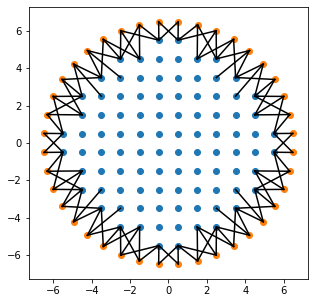

In [16]:
barrel_to_endcap = {}
for bari, (barx, bary) in enumerate(zip(barxs, barys)):
    
    dist = (barx-endxs)**2 + (bary-endys)**2
    endis = np.argpartition(dist, 3)[:3]
    
    barrel_to_endcap[bari] = [i for i in endis if dist[i] < 100]
    
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
endxs, endys = plot_endcap(ax)
barxs, barys = plot_barrel(ax)

# for i, (endx, endy) in enumerate(zip(endxs, endys)):
#     ax.annotate(i, (endx, endy))
    
# for i, (barx, bary) in enumerate(zip(barxs, barys)):
#     ax.annotate(i, (barx, bary))

barrel_to_endcap[0].remove(91)
barrel_to_endcap[9].remove(58)
barrel_to_endcap[10].remove(46)
barrel_to_endcap[19].remove(5)
barrel_to_endcap[20].remove(4)
barrel_to_endcap[29].remove(37)
barrel_to_endcap[30].remove(49)
barrel_to_endcap[39].remove(90)

for k,vs in barrel_to_endcap.items():
    for v in vs:
        plt.plot([barxs[k], endxs[v]], [barys[k], endys[v]], c='k')

# Export Edges

In [17]:
# Barrel mPMTs + Endcap mPMTs edges

all_edges = {k:v.copy() for k,v in edges.items()}

# Barrel to Endcap mPMTs edges

for k, vs in barrel_to_endcap.items():
    for v in vs:
        #top 
        all_edges[(k+696)*19+18].append((v+736)*19+18)
        all_edges[(v+736)*19+18].append((k+696)*19+18)
        #top 
        all_edges[(k+560)*19+18].append((v+600)*19+18)
        all_edges[(v+600)*19+18].append((k+560)*19+18)

# Add PMTs edges within mPMTs

for i in range(num_pmts//19):
    for k,vs in within_mPMT_edges.items():
        k = k + i*19
        for v in vs:
            v = v + i*19
            all_edges[k].append(v)


In [18]:
sum([len(v) for v in all_edges.values()])

66552

# mPMT edges

In [19]:
mPMT_edges = {k//19:np.unique(np.array(v)//19).tolist() for k,v in all_edges.items() if (k-18)%19 == 0 }
for k,v in mPMT_edges.items():
    v.remove(k)

In [20]:
import pickle

with open("edges_dict.pkl", 'wb') as f:
    pickle.dump(all_edges, f, pickle.HIGHEST_PROTOCOL)
    
with open("mpmt_edges_dict.pkl", 'wb') as f:
    pickle.dump(mPMT_edges, f, pickle.HIGHEST_PROTOCOL)